In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier

import keras
from keras.callbacks import EarlyStopping

from keras.utils import np_utils, to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout



In [10]:
df = pd.read_csv("../danger_level.csv")
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2137 entries, 0 to 2516
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   processo_numero         2137 non-null   object 
 1   solicitacao_data        2137 non-null   object 
 2   solicitacao_hora        2137 non-null   object 
 3   solicitacao_descricao   2137 non-null   object 
 4   solicitacao_bairro      2137 non-null   object 
 5   solicitacao_localidade  2137 non-null   object 
 6   solicitacao_endereco    2137 non-null   object 
 7   processo_ocorrencia     2137 non-null   object 
 8   confirmado              2137 non-null   int64  
 9   latitude                2137 non-null   float64
 10  longitude               2137 non-null   float64
 11  cond                    2137 non-null   bool   
 12  em_recife               2137 non-null   int64  
 13  rain_hour               2137 non-null   float64
 14  rain_day                2137 non-null   

In [11]:
df = df.sample(frac=1).reset_index(drop=True)

In [80]:
y = df['processo_ocorrencia']
X = df[['altitude', 'rain_day', 'rain_hour', 'ground_type', 'danger_level']]


In [95]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)


dummy_y = np_utils.to_categorical(encoded_y)

encoder.fit(X['danger_level'])
X['danger_level'] = encoder.transform(X['danger_level'])

encoder.fit(X['ground_type'])
X['ground_type'] = encoder.transform(X['ground_type'])

print(y.head(7), encoded_y[6])
y.unique()



0       Imoveis com Danos/Risco
1       Imoveis com Danos/Risco
2              Arvores em Risco
3       Imoveis com Danos/Risco
4              Arvores em Risco
5       Imoveis com Danos/Risco
6    Deslizamentos de Barreiras
Name: processo_ocorrencia, dtype: object 6


C:\Users\parae\AppData\Local\Temp\ipykernel_10248\1308277325.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['danger_level'] = encoder.transform(X['danger_level'])
C:\Users\parae\AppData\Local\Temp\ipykernel_10248\1308277325.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ground_type'] = encoder.transform(X['ground_type'])


array(['Imoveis com Danos/Risco', 'Arvores em Risco',
       'Deslizamentos de Barreiras', 'Incendios', 'Imoveis Alagados',
       'Alagamentos',
       'Desabamento Parcial de Obras de Contencao/Drenagem',
       'Muro com Danos',
       'Desabamento Total de Obras de Contencao/Drenagem',
       'Desabamento Parcial Imoveis', 'Desabamento Total Imoveis',
       'Tombamento de Arvores', 'Invasao de Terreno de Auxilio Moradia',
       'Postes em Risco', 'Elevacao do Nivel do Rio',
       'Transbordamentos de Canais'], dtype=object)

In [113]:
X = np.array(X)


model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(16, activation='softmax'))
model.summary()

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

X.shape[1]

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 16)                96        
                                                                 
 dense_30 (Dense)            (None, 16)                272       
                                                                 
Total params: 368
Trainable params: 368
Non-trainable params: 0
_________________________________________________________________


5

In [114]:
# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=50, 
                                   restore_best_weights=True)




history = model.fit(X,
                    dummy_y,
                    callbacks=[es],
                    epochs=8000000, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.4,
                    verbose=1)


Epoch 1/8000000
129/129 [==============================] - 1s 3ms/step - loss: 8.4454 - accuracy: 0.2504 - val_loss: 3.4516 - val_accuracy: 0.2000
Epoch 2/8000000
129/129 [==============================] - 0s 3ms/step - loss: 3.1196 - accuracy: 0.2192 - val_loss: 2.6532 - val_accuracy: 0.2257
Epoch 3/8000000
129/129 [==============================] - 0s 3ms/step - loss: 2.4230 - accuracy: 0.3300 - val_loss: 2.1262 - val_accuracy: 0.3848
Epoch 4/8000000
129/129 [==============================] - 0s 3ms/step - loss: 2.0316 - accuracy: 0.4072 - val_loss: 1.9579 - val_accuracy: 0.4339
Epoch 5/8000000
129/129 [==============================] - 0s 3ms/step - loss: 1.8807 - accuracy: 0.4314 - val_loss: 1.8756 - val_accuracy: 0.4363
Epoch 6/8000000
129/129 [==============================] - 0s 3ms/step - loss: 1.8061 - accuracy: 0.4353 - val_loss: 1.8350 - val_accuracy: 0.4421
Epoch 7/8000000
129/129 [==============================] - 0s 3ms/step - loss: 1.7650 - accuracy: 0.4548 - val_loss: 1

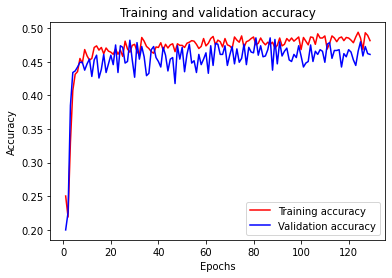

In [115]:
import matplotlib.pyplot as plt

history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [116]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X) # see how the model did!
print(preds[0]) # i'm spreading that prediction across three nodes and they sum to 1
print(np.sum(preds[0])) # sum it up! Should be 1
## [9.9999988e-01 1.3509347e-07 6.7064638e-16]
## 1.0

# Almost a perfect prediction
# actual is left, predicted is top
# names can be found by inspecting Y
matrix = confusion_matrix(dummy_y.argmax(axis=1), preds.argmax(axis=1))
print(matrix)



# more detail on how well things were predicted
print(classification_report(dummy_y.argmax(axis=1), preds.argmax(axis=1)))


67/67 [==============================] - 0s 968us/step
[1.9436890e-02 1.4707536e-01 1.6325070e-02 4.3200009e-04 4.6663772e-04
 6.5983874e-03 2.5948182e-01 2.8701822e-12 3.3147797e-02 3.1869188e-01
 7.2199181e-03 7.4122921e-02 9.7651772e-02 7.3138056e-03 1.2029150e-02
 6.6122170e-06]
1.0
[[  0   0   0   0   0   0   7   0   0  33   0   0   2   0   0   0]
 [  0  19   2   0   0   0 173   0   0  95   0   0   2   0   0   0]
 [  0   2   2   0   0   0  20   0   0  46   0   0   4   0   0   0]
 [  0   2   0   0   0   0   3   0   0   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   4   0   0   2   0   0   0   0   0   0]
 [  0  18   0   0   0   0 480   0   0 147   0   0   2   0   0   0]
 [  0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  19   0   0  34   0   0   0   0   0   0]
 [  0  20   0   0   0   0 202   0   0 507   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  18 

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
